# DC Movie Profit Prediction - Machine Learning

In [14]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [54]:
dc_films = pd.read_csv('Resources/DCEU_BoxOffice_Data.csv', index_col='movie_code')
dc_films.head()


,county_code,date,opening,gross
movie_code,,,,
101,1,14-Jun-13,116619362,291045518
101,43,21-Jun-13,386043,1315939
101,32,19-Jun-13,929553,2158005
101,359,21-Jun-13,71443,222756
101,385,20-Jun-13,182734,359095


In [47]:
dc_films.corr()



,county_code
county_code,1.0


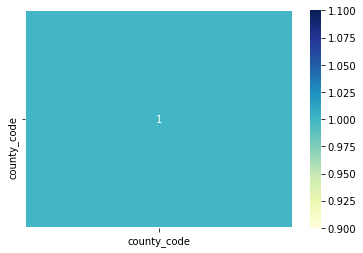

In [55]:
sns.heatmap(dc_films.corr(), cmap='YlGnBu', annot=True, linewidths = 0.2)

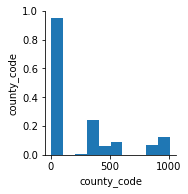

In [56]:
import seaborn as sb
sb.pairplot(dc_films)

In [59]:
dc_profit = pd.read_csv('Resources/DCEU_Profits.csv')
dc_profit

,movie_name,Opening,Average Opening For All Countries,Gross,Average Gross for All Countries
0,Man of Steel,"$226,478,579.00","$4,355,357.29","$635,752,277.00","$11,559,132.31"
1,Batman v Superman: Dawn of Justice,"$356,076,879.00","$7,740,801.72","$853,210,722.00","$13,331,417.53"
2,Suicide Squad,"$244,258,106.00","$7,401,760.79","$670,993,018.00","$16,365,683.37"
3,Wonder Woman,"$230,260,677.00","$6,059,491.50","$591,286,485.00","$13,750,848.49"
4,Justice League,"$734,141,594.00","$4,195,094.82","$2,331,312,896.00","$11,101,489.98"
5,Aquaman,"$249,387,590.00","$6,740,205.14","$1,740,026,411.00","$10,419,319.83"
6,Shazam!,"$128,859,190.00","$3,391,031.32","$333,935,479.00","$7,259,466.93"
7,Birds of Prey,"$56,994,063.00","$2,035,502.25","$154,779,487.00","$4,552,337.85"
8,Wonder Woman 1984,"$56,583,702.00","$2,176,296.23","$155,695,817.00","$5,022,445.71"


In [52]:
X = dc_films["movie_code"].values.reshape(-1, 1)
y = dc_films["opening"].values.reshape(-1, 1)

KeyError: 'movie_code'

In [50]:
print("Shape: ", X.shape, y.shape)

Shape:  (417, 1) (417, 1)


TypeError: unhashable type: 'numpy.ndarray'

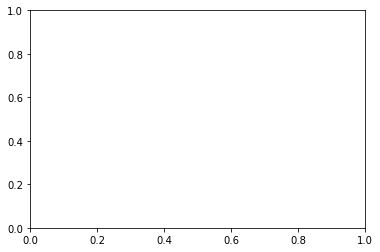

In [51]:
plt.scatter(X, y)
plt.xlabel("Date")
plt.ylabel("Opening Profit")

In [34]:
import seaborn as sb

sb.pairplot(dc_profit)

ValueError: figure size must be positive finite not (0.0, 0.0)